In [1]:
import keras
from keras.layers import LSTM, Dropout, Dense
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("sample_data/depresi_data.csv")
data.head()

,No,DAS 1,DAS 2,DAS 3,DAS 4,DAS 5,DAS 6,DAS 7,DAS 8,DAS 9,...,DAS 13,DAS 14,DAS 15,DAS 16,DAS 17,DAS 18,DAS 19,DAS 20,DAS 21,Target
0,1,0.90,0.63,0.37,0.10,0.10,0.63,0.90,0.63,0.63,...,0.37,0.37,0.37,0.37,0.37,0.37,0.37,0.37,0.37,0.25
1,2,0.63,0.90,0.37,0.37,0.37,0.37,0.37,0.37,0.37,...,0.37,0.37,0.37,0.37,0.63,0.63,0.37,0.37,0.37,0.00
2,3,0.10,0.37,0.10,0.10,0.10,0.10,0.10,0.37,0.10,...,0.10,0.37,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.00
3,4,0.10,0.37,0.10,0.10,0.10,0.37,0.37,0.10,0.37,...,0.37,0.10,0.10,0.10,0.10,0.10,0.37,0.10,0.10,1.00
4,5,0.37,0.90,0.37,0.10,0.37,0.37,0.37,0.37,0.37,...,0.37,0.37,0.10,0.37,0.10,0.37,0.10,0.10,0.37,0.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      145 non-null    int64  
 1   DAS 1   145 non-null    float64
 2   DAS 2   145 non-null    float64
 3   DAS 3   145 non-null    float64
 4   DAS 4   145 non-null    float64
 5   DAS 5   145 non-null    float64
 6   DAS 6   145 non-null    float64
 7   DAS 7   145 non-null    float64
 8   DAS 8   145 non-null    float64
 9   DAS 9   145 non-null    float64
 10  DAS 10  145 non-null    float64
 11  DAS 11  145 non-null    float64
 12  DAS 12  145 non-null    float64
 13  DAS 13  145 non-null    float64
 14  DAS 14  145 non-null    float64
 15  DAS 15  145 non-null    float64
 16  DAS 16  145 non-null    float64
 17  DAS 17  145 non-null    float64
 18  DAS 18  145 non-null    float64
 19  DAS 19  145 non-null    float64
 20  DAS 20  145 non-null    float64
 21  DAS 21  145 non-null    float64
 22  Ta

In [ ]:
rec_count = len(data)
rec_count

145

In [ ]:
sequence_length = 10

In [ ]:
def generate_data(X, y, sequence_length = 10, step = 1):
    X_local = []
    y_local = []
    for start in range(0, len(data) - sequence_length, step):
        end = start + sequence_length
        X_local.append(X[start:end])
        y_local.append(y[end-1])
    return np.array(X_local), np.array(y_local)

X_sequence, y = generate_data(data.loc[:, "DAS 1":"DAS 21"].values, data.Target)

In [ ]:
X_sequence.shape, y.shape

((135, 10, 21), (135,))

In [ ]:
int(284797 * 0.7)

199357

In [ ]:
model = keras.Sequential()
model.add(LSTM(100, input_shape = (10, 21)))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="binary_crossentropy"
              , metrics=[keras.metrics.binary_accuracy]
              , optimizer=opt)

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 100)               48800     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 48,901
Trainable params: 48,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
training_size = int(len(X_sequence) * 0.7)
training_size

94

In [ ]:
X_train, y_train = X_sequence[:training_size], y[:training_size]
X_test, y_test = X_sequence[training_size:], y[training_size:]

In [ ]:
len(X_train)

94

In [ ]:
len(X_test)

41

In [ ]:
model.fit(X_train, y_train, batch_size=1, epochs=500)

Epoch 1/500
94/94 [==============================] - 2s 4ms/step - loss: 0.7482 - binary_accuracy: 0.5426
Epoch 2/500
94/94 [==============================] - 0s 4ms/step - loss: 0.6983 - binary_accuracy: 0.4894
Epoch 3/500
94/94 [==============================] - 0s 4ms/step - loss: 0.6904 - binary_accuracy: 0.5106
Epoch 4/500
94/94 [==============================] - 0s 4ms/step - loss: 0.7007 - binary_accuracy: 0.5319
Epoch 5/500
94/94 [==============================] - 0s 4ms/step - loss: 0.6964 - binary_accuracy: 0.5213
Epoch 6/500
94/94 [==============================] - 0s 4ms/step - loss: 0.6574 - binary_accuracy: 0.5213
Epoch 7/500
94/94 [==============================] - 0s 4ms/step - loss: 0.6456 - binary_accuracy: 0.5638
Epoch 8/500
94/94 [==============================] - 0s 4ms/step - loss: 0.6473 - binary_accuracy: 0.5532
Epoch 9/500
94/94 [==============================] - 0s 4ms/step - loss: 0.6488 - binary_accuracy: 0.5532
Epoch 10/500
94/94 [==========================

In [ ]:
model.evaluate(X_test, y_test, batch_size=1)

41/41 [==============================] - 0s 2ms/step - loss: 5.5003 - binary_accuracy: 0.3171


[5.500250816345215, 0.31707316637039185]

In [ ]:
y_test_prob = model.predict(X_test, verbose=1, batch_size=1)

41/41 [==============================] - 0s 2ms/step


In [ ]:
y_test_prob

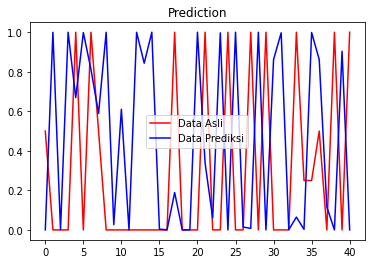

In [ ]:
#Visualising the results
plt.plot(y_test, color = 'red', label = 'Data Asli')
plt.plot(y_test_prob, color = 'blue', label = 'Data Prediksi')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
y_test_pred = np.where(y_test_prob > 0.25, 1, 0)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

ValueError: ignored